
# Imports

In [84]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from colorama import Fore, Back, Style # Nice Colors
import customUtils as ut
import customUtils3 as ut2
import os


# Pipeline

In [85]:
images = []

fixedImages = [(_,_,_)] * 16

import os
# Path to the folder containing images
image_folder = "TC"
# Loop through all files in the folder
for filename in os.listdir(image_folder):
    if filename.lower().endswith((".jpg", ".jpeg", ".png")): 
        image_path = os.path.join(image_folder, filename)
        normal_img = cv2.imread(image_path)
        __, thresholded_img = cv2.threshold(normal_img, 88, 255, cv2.THRESH_BINARY)
        image_tuple = (normal_img, thresholded_img, normal_img)  # Include normal image twice
        images.append(image_tuple)


kernel = np.ones((3,3), np.uint8)  # For Any Dilation \ Erosion Operations


for idx,img in enumerate(images):
    # Loop over the images, Check for issues, If issue exists --> Fix it using the suitable function
    img = img
    img = list(img)
    img[2] = cv2.cvtColor(img[2],cv2.COLOR_BGR2GRAY)
    cnts = ut2.findContours(img[2])
    

    if (ut2.filterContours(cnts) == (True,0)  or (idx == 4) ): # Image doesn't need fixing, TC5 Doesnt need fixing
        # Do Nothing
        print(Fore.GREEN,'Test Case ',idx+1,'doesn\'t need fixing')
    
    # Indivdual Solutions Corner #
    if(idx == 12):
        print(Fore.CYAN,'TC 13 has an individual solution')
        equalized_image = cv2.equalizeHist(img[2])
        ret, binary_img = cv2.threshold(equalized_image, 128, 255, cv2.THRESH_BINARY)
        eroded_img = cv2.erode(binary_img, kernel, iterations=11)
        dilated_img = cv2.dilate(eroded_img, kernel, iterations=10)
        fixedImages[idx] = dilated_img
        print(Fore.GREEN,'TC 13 Fixed')
    if (idx == 14):
        print(Fore.CYAN,'TC 15 has an individual solution')
        fixedImages[idx] = cv2.threshold(gray_img, 88, 255, cv2.THRESH_BINARY)
        print(Fore.GREEN,'TC 15 Fixed')

    # Indivdual Solutions Corner #

    
    elif(ut2.filterContours(cnts) == (False,1)): # Image needs to be rotated
        while(ut2.filterContours(cnts) == (False,1)):
            # Try Flipping The Image
            print(Fore.RED,'Test Case ',idx+1,' has all the locator boxes, But they are misalligned  ' + Fore.YELLOW,'Flipping...')
            __,__,totalcnts = ut2.filterContoursV2(cnts)
            flipped =  ut.fixFlippedFixedQr(img[2],totalcnts)
            cnts = ut2.findContours(flipped)
            img[2] = flipped
        print(Fore.GREEN,'Test Case ',idx+1,' Rotation Fixed')
    if(ut2.isAlmostInvisibleDark(img[2])):
        print(Fore.YELLOW,'Test Case ',idx+1, ' Is too dark')
        img[2] = ut2.invertImg(img[2])
        print(Fore.GREEN,'Test Case' ,idx+1,' Fixed')
        cnts = ut2.findContours(img[2])
    elif(ut2.isAlmostInvisible(img[2]) and idx != 3):
        print(Fore.RED,'Test Case ', idx+1, ' needs to be Thresholded with the mean value and Have the locators re-drawn')
        img[2] = ut2.threshHoldMean(img[2])
        img[2] = ut2.drawLocatorBoxes(img[2])
        img[2] = cv2.dilate(img[2],kernel,iterations=1)
        print(Fore.GREEN,'Test Case' ,idx+1,' Fixed')
    if (ut2.isSkewed(img[2])[0] == True):
        __,angle = ut2.isSkewed(img[2])
        print(Fore.RED,'Test Case ',idx+1, ' Needs to be unskewed')
        img[2] = ut2.fixSkew(img[2],angle)
        print(Fore.GREEN,'Test Case ',idx+1, ' Fixed')
    if(ut2.detectPeriodicNoise(img[2]) == True):
        print(Fore.RED,'Test Case ',idx+1, ' Has Periodic Noise.')
        img[2] = ut2.fixPeriodicNoise(img[2])
        print(Fore.GREEN,'Test Case ',idx+1, ' Fixed')
    fixedImages[idx] = img[2]



 Test Case  1 doesn't need fixing
 Test Case  2  Needs to be unskewed
 Test Case  2  Fixed
 Test Case  3  has all the locator boxes, But they are misalligned   Flipping...
 Test Case  3  Rotation Fixed
 Test Case  4  has all the locator boxes, But they are misalligned   Flipping...
 Test Case  4  Rotation Fixed
 Test Case  4  Is too dark
 Test Case 4  Fixed
 Test Case  5 doesn't need fixing
 Test Case  8  needs to be Thresholded with the mean value and Have the locators re-drawn
 Test Case 8  Fixed
 Test Case  10  needs to be Thresholded with the mean value and Have the locators re-drawn
 Test Case 10  Fixed
 Test Case  11  Has Periodic Noise.
 Test Case  11  Fixed
 TC 13 has an individual solution
 TC 13 Fixed
 Test Case  13  Is too dark
 Test Case 13  Fixed
 Test Case  14  needs to be Thresholded with the mean value and Have the locators re-drawn


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\arithm.cpp:230: error: (-215:Assertion failed) (mtype == CV_8U || mtype == CV_8S) && _mask.sameSize(*psrc1) in function 'cv::binary_op'


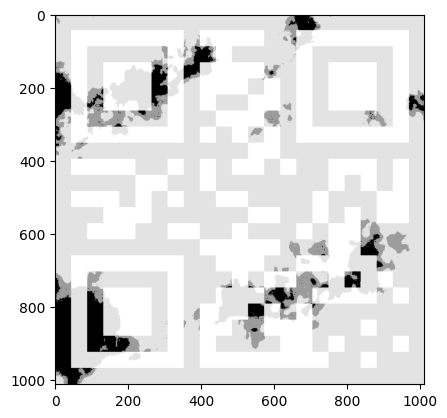

In [ ]:
plt.imshow(fixedImages[12],cmap='gray')